In [3]:
from PIL import Image, ImageDraw, ImageFont
import os
import numpy as np
import skimage
import matplotlib.pyplot as plt
import cv2
from glob import glob
from tqdm.notebook import tqdm
from heapq import *

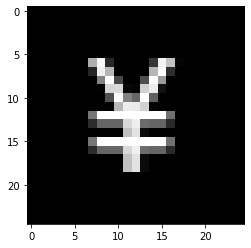

In [5]:
image = skimage.io.imread('test.png', as_gray=True)
image = np.round((image * 255)).astype(np.uint8)
image[image < 20] = 255
image2 = 255 - image

plt.imshow(image2[:25, 50:75], cmap='gray')

In [6]:
char = chr(209)
font = ImageFont.truetype("arial.ttf", 18)
image = Image.new("L", image_size, "black")
draw = ImageDraw.Draw(image)
x, y, w, h = font.getbbox(char)
draw.text((5, 1), char, fill="white", font=font)

plt.subplot(131)
plt.imshow(image, cmap='gray')
plt.subplot(132)
plt.imshow(image2[:25, :25], cmap='gray')
plt.subplot(133)
plt.imshow(np.abs(np.array(image) - image2[:25, :25]), cmap='gray', vmin=0, vmax=255)

OSError: cannot open resource

In [7]:
char_files = glob('dataset/*.png')
chars = {}
for file in tqdm(char_files):
    char = int(os.path.basename(file).replace(".png", ""))
    chars[char] = (
        skimage.io.imread(file, as_gray=True)
    )

Widget Javascript not detected.  It may not be installed or enabled properly. Reconnecting the current kernel may help.


AttributeError: 'FloatProgress' object has no attribute 'style'

In [250]:
def predict_image(image):
    h, l = image.shape
    err = lambda x, y: np.sum(np.abs(x - y))

    for i in range(0, l, 25):
        errors = []
        part = image[:25, i:i+25]
        for key, img in chars.items():
            errors.append([err(part, img), key])
        heapify(errors)
        error, char = heappop(errors)
        print("char =", chr(char), "error =", error)

In [251]:
predict_image(image2)

char =   error = 11427
char =   error = 535
char = + error = 8271
char =   error = 1148
char =   error = 8151
